# Doc Reader

In [36]:
import os
import pandas as pd
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import tensorflow as tf
import pytesseract
from PIL import Image
import easyocr
from wordcloud import WordCloud
import re
from haystack.nodes import TextConverter, PreProcessor
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import numpy as np
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from string import punctuation
from unidecode import unidecode

In [2]:
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'  

ORC con PytTesseract

In [3]:
image = Image.open('data\scientific_publication\doc_000240.png')
text = pytesseract.image_to_string(image)

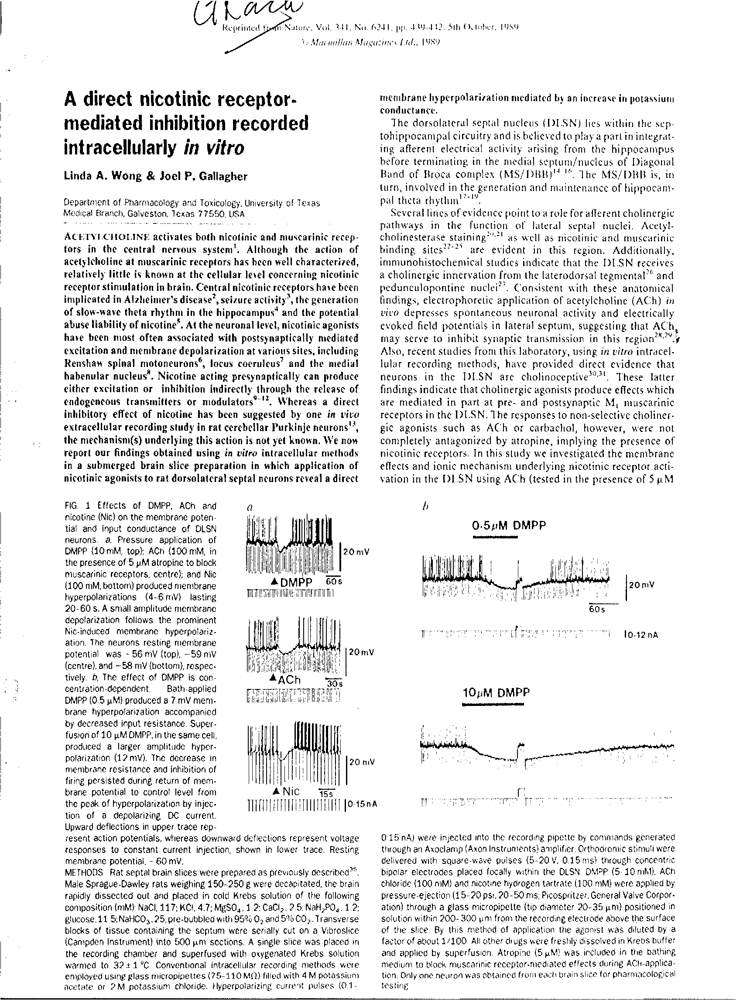

In [4]:
image

In [5]:
print(text)

Lary

A ripen

A direct nicotinic receptor-
mediated inhibition recorded
intracellularly in vitro

Linda A. Wong & Joe! P. Gallagher

Department of Parmaceiogy and Toco. Unversiy of Texas
‘Mosel fereh Gveston Texas 77580 VA

ACEIVECHOLINE activates both nicotinic and muscatn
tors in the central nervous system’. Although the a
acetylcholine at rivseainic receptors has beca wel ch
‘relatively little is hoown atthe cellular level coaceraing nicotinic
receptor stinifaton in brain, Cental nicotinic receptors have been
implicated in Alzheimer's disease, seizure actisiy” the generation
‘of slonenane theta rhythm inthe hippocampus! and the potetil
abuse lability of nicotine’, At the neuronal lve, nicotinic agonists
hhave been most often associated with postsynaptically mediated
‘excitation and membrane depolarization at arious si

Renshaw spinal mn

hhabenulae nucleus

icatine acting presynaptically can produce
cither excitation or inhibition Indiectly through the release of
‘endogencous trans

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Max\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
stopwords_list = stopwords.words("english")

In [8]:
def preprocess_data(text):
    text = text.lower()
    text = text.replace("\n"," ").replace("\t"," ")
    text = re.sub("\s+"," ",text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    # tokens
    tokens = word_tokenize(text)
    
    data = [i for i in tokens if i not in punctuation]
    data = [i for i in data if i not in stopwords_list]
    
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    final_text = []
    for i in data:
        word = lemmatizer.lemmatize(i)
        final_text.append(word)
        
    return " ".join(final_text)


In [9]:
class_labels = {'email':0,'resume':1,'scientific_publication':2}
final_text = []
final_label = []
path = "data/"
file_folder = os.listdir(path)

for label in file_folder:
        label_path = os.path.join(path,label)
        for j in os.listdir(label_path):
            image = Image.open(label_path+"/"+j)
            text = pytesseract.image_to_string(image)
            text_data = preprocess_data(text)
            
            final_text.append(text_data)
            final_label.append(class_labels[label])

text_df = pd.DataFrame()
text_df['text'] = final_text
text_df['label'] = final_label

In [10]:
text_df["text"][110]

'contribution tobacco constituent phenol yield cigarette j h bell saunders w spear research division p lorillard company inc greensboro north carolina usa phenol determined pyrolytic study may misleading combustion tube fixed rate component cigarette smoke moreover individual com temperature controlled many year pound pyrolyzed absence c trapping system con recently study appeared tobacco component eannot sisted conventional cold trap origin phenol respect ye neglected reaching conclusion submerged dry iceacetons specific tobaceo constituent al since may produce catalytic slurry phenol analysis though investigator spec effect carried method described ulated area addition c labeled com spear except steam tt would appear possible study pound tobseco appears offer distillation omitted rela conversion tobacco constitu unequivocal technique tive standard devidtion pyro cent smoking process studying contribution pre ivtie procedure found enriching depleting tobacco cursor smoke constituent r

In [16]:


# data_path = ""
# categories = os.listdir(data_path)
# num_classes = len(categories)


# X = []
# y = []


# for category_id, category in enumerate(categories):
#     category_path = os.path.join(data_path, category)
#     for img_name in os.listdir(category_path):
#         img_path = os.path.join(category_path, img_name)
#         img = cv2.imread(img_path)
#         img = cv2.resize(img, (64, 64))  # Ridimensionamento delle immagini a dimensioni uniformi
#         X.append(img)
#         y.append(category_id)


# X = np.array(X) / 255.0  # Normalizzazione dei valori dei pixel tra 0 e 1

# # Conversione delle etichette in formato one-hot encoding
# y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print("Dimensioni del set di addestramento:", X_train.shape, y_train.shape)
# print("Dimensioni del set di test:", X_test.shape, y_test.shape)




In [17]:
text_df['text']

0      moskowitz seth w coggins chris ce bc subject j...
1      teitelbaum shari thu jul subject july ath meet...
2      mary sue sent monday october pm suydam loraine...
3      ovignal massage moor tamara sent monday cider ...
4      per know need add hanover also want add peters...
                             ...                        
160    oteetan amo canvas biol spt p got eo seaok gpy...
161    xcoconjugate journal sb use monoclonal antilig...
162    copyright reprinted biochemistry amer le seiet...
163    revised archces international de pharmacodynam...
164    copyrgi te ameria aasonont inmunlogate product...
Name: text, Length: 165, dtype: object

In [18]:
text = text_df['text']
labels = text_df['label']
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000, oov_token="<OOV>")
tokenizer.fit_on_texts(text)
sequences = tokenizer.texts_to_sequences(text)
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=10, padding='post', truncating='post')
xtrain_pad = np.array(padded_sequences)
ytrain = np.array(labels)

Rete neurale

In [37]:
def create_model(optimizer='adam', dropout_rate=0.5):
    model = Sequential()
    model.add(Embedding(input_dim=1000, output_dim=16, input_length=10))
    model.add(LSTM(64, return_sequences=True))
    model.add(Dropout(dropout_rate))
    model.add(LSTM(64))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(3, activation='sigmoid'))
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)

param_grid = {
    'optimizer': ['adam', 'rmsprop'],
    'dropout_rate': [0.3, 0.5, 0.7]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1)
grid_result = grid.fit(xtrain_pad, ytrain)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


C:\Users\Max\AppData\Local\Temp\ipykernel_21316\4046197384.py:14: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=50, batch_size=32, verbose=0)


Best: 0.545455 using {'dropout_rate': 0.3, 'optimizer': 'adam'}


Valutazione del modello

In [38]:

# new_data = ["a field that holds immense promise for revolutionizing computation. The authors begin by providing an overview of the fundamental principles of quantum mechanics that underlie quantum computing, emphasizing the unique properties of qubits and their potential to exist in multiple states simultaneously. The publication discusses current state-of-the-art quantum computing technologies, highlighting breakthroughs in qubit stability, error correction, and quantum gate operations. It delves into the ongoing efforts to scale up quantum processors, addressing challenges related to decoherence and maintaining quantum coherence over extended periods. Moreover, the authors discuss practical applications of quantum computing, ranging from optimization problems and cryptography to machine learning and simulations of quantum systems. They explore the potential impact of quantum computers on various industries and emphasize the need for interdisciplinary collaboration to fully unlock their capabilities. The publication also addresses the challenges faced by researchers, including the development of scalable quantum algorithms, error mitigation techniques, and the integration of quantum computers with classical systems. Additionally, the authors provide insights into the future prospects of quantum computing, discussing emerging technologies, quantum communication, and the race towards achieving quantum advantage."]
new_data = ["Hello Brian I'm am Max your childhood friend, wanna hang out?"]
test_sequences = tokenizer.texts_to_sequences(new_data)
new_test_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=10, padding='post', truncating='post')

predictions = grid_result.best_estimator_.model.predict(new_test_sequences)

class_labels = {0: 'email', 1: 'resume', 2: 'scientific_publication'}

predicted_labels = [np.argmax(prediction) for prediction in predictions]
predicted_classes = [class_labels[label] for label in predicted_labels if label in class_labels]
for i, text in enumerate(new_data):
    print(f"Testo: {text}")
    if predicted_labels[i] in class_labels:
        print(f"Classe predetta: {predicted_classes[i]}")
    else:
        print(f"Classe predetta: Etichetta mancante ({predicted_labels[i]})")
    print("="*30)


1/1 [==============================] - 1s 960ms/step
Testo: Hello Brian I'm am Max your childhood friend, wanna hang out?
Classe predetta: email
